In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

#### To create extra features we make a join/merge with the ratings dataframe to get-

##### TotalRating

In [3]:
df = pd.DataFrame()
df = pd.merge(movies, ratings, how='left', on='movieId')
df = df.groupby('movieId').sum()
movies = pd.merge(movies, df, how='inner', on='movieId')

In [4]:
movies.drop(['userId','timestamp'], axis = 1, inplace=True)

##### RatingsCount

In [5]:
df = pd.DataFrame()
df = pd.merge(movies, ratings, how='inner', on='movieId')
df = pd.DataFrame(df.groupby('movieId').count().userId)
movies = pd.merge(movies, df, how='inner', on='movieId')

In [6]:
movies.rename(columns={'userId':'RatingsCount', 'rating':'TotalRating'}, inplace=True)

##### MovieLength

In [7]:
df = pd.DataFrame()
df = pd.merge(movies, ratings, how='inner', on='movieId')
df = pd.DataFrame(df.groupby('movieId').max().timestamp)
movies = pd.merge(movies, df, how='inner', on='movieId')

#### Splitting the title column to remove DateOfRelease

In [8]:
# movies['genres'] = movies['genres'].str.lower().str.split('|')
movies['YearofRelease'] = movies['title'].str.split().str[-1].str[1:-1]
movies['title'] = movies.title.str.split('\(\d{4}\)').str[0]

##### Calculate AvgRating

In [9]:
movies['AvgRating'] = movies.TotalRating/movies.RatingsCount

#### Visualizing Top5, bottom5 movies based on TotalRatinga and AvgRating. Also, the MostRated movies

Text(0, 0.5, 'Total Rating')

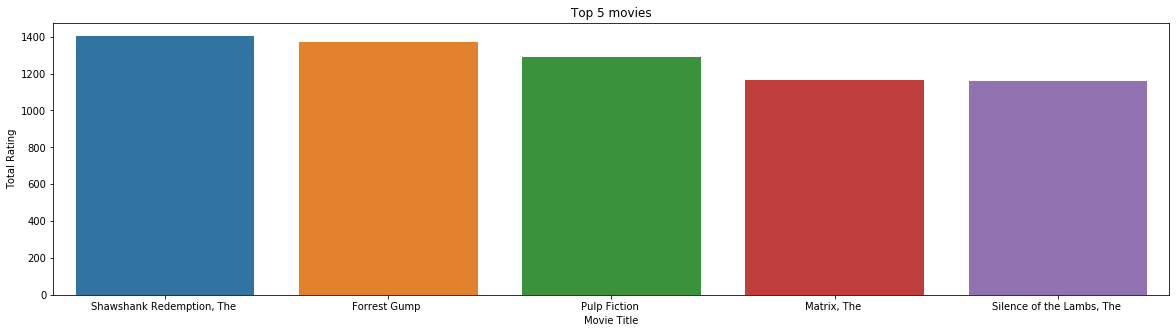

In [10]:
top5 = pd.DataFrame(movies.sort_values(by=['TotalRating', 'AvgRating'], ascending=False).iloc[0:5])
top5.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,5))
sns.barplot(x=top5.title, y=top5.TotalRating)
plt.title('Top 5 movies')
plt.xlabel('Movie Title')
plt.ylabel('Total Rating')

Text(0, 0.5, 'Total Rating')

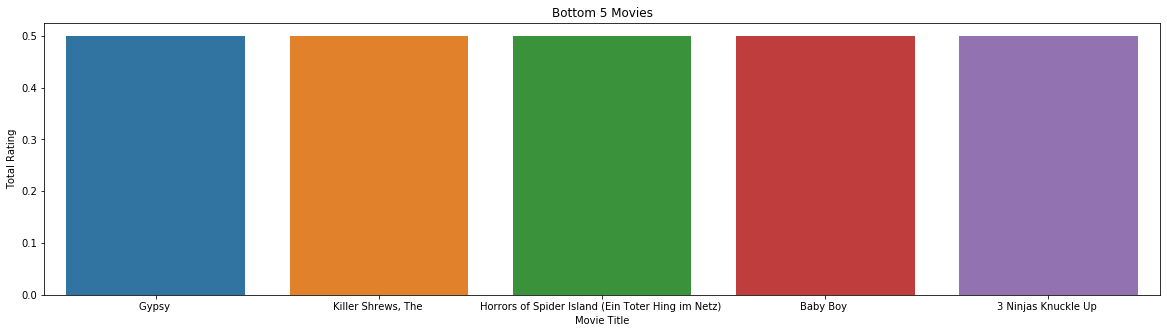

In [11]:
bottom5 = pd.DataFrame(movies.sort_values(by=['TotalRating', 'AvgRating'], ascending=True).iloc[0:5])
bottom5.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,5))
sns.barplot(x=bottom5.title, y=bottom5.TotalRating)
plt.title('Bottom 5 Movies')
plt.xlabel('Movie Title')
plt.ylabel('Total Rating')

Text(0, 0.5, 'Total Rating Count')

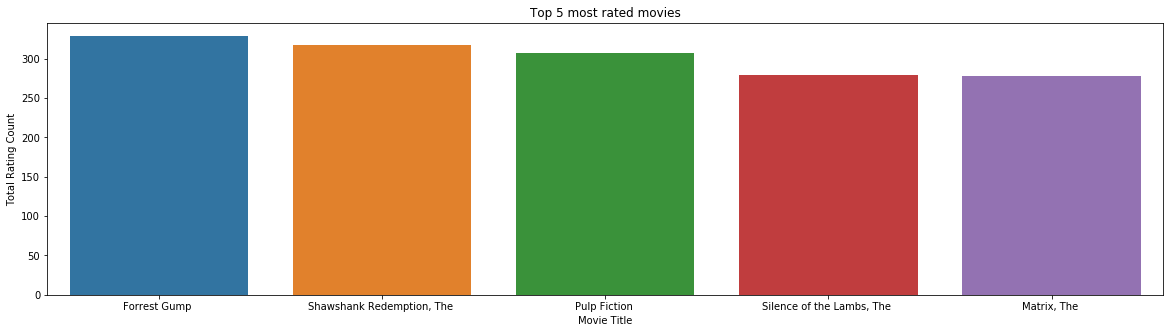

In [12]:
most_rated_movies = pd.DataFrame(movies.sort_values(by=['RatingsCount'], ascending=False).iloc[0:5])
most_rated_movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,5))
sns.barplot(x=most_rated_movies.title, y=most_rated_movies.RatingsCount)
plt.title('Top 5 most rated movies')
plt.xlabel('Movie Title')
plt.ylabel('Total Rating Count')

#### The movies with the highest MovieLength

Text(0, 0.5, 'Movie length')

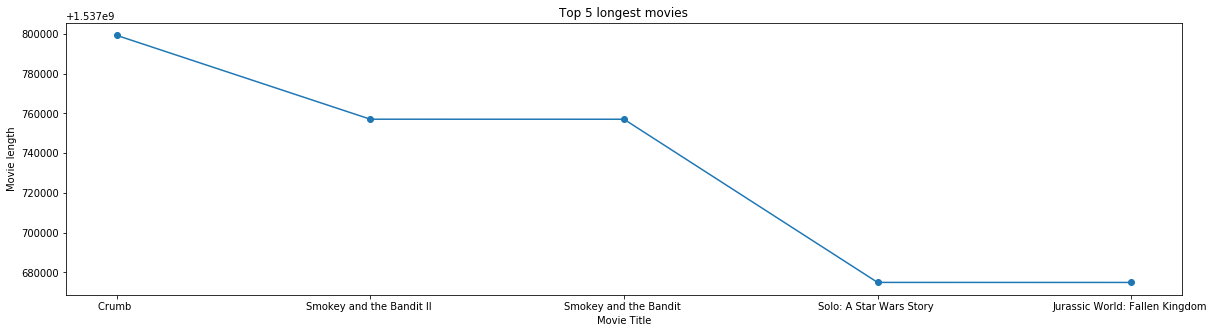

In [13]:
longest_movies = pd.DataFrame(movies.sort_values(by=['timestamp'], ascending=False).iloc[0:5])
longest_movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,5))
plt.plot(longest_movies.title, longest_movies.timestamp, marker='o')
plt.title('Top 5 longest movies')
plt.xlabel('Movie Title')
plt.ylabel('Movie length')

##### Using TfidfVectorizer to create a sparse_matrix. Setting analyzer to use combination of genres as we are intrested in combination of genres and not as if they followed a sequencial information

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import combinations

movies = pd.read_csv('movies.csv')

tf = TfidfVectorizer(analyzer=lambda s: (c for i in range(1,4) for c in combinations(s.split('|'), r=i)))
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 783)

###### Sample of the matrix created wrt to movie title only 5 columns and 10 rows are shown

In [15]:
pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(), index=movies.title).sample(5, axis=0).sample(10, axis=1)

,"(Action, Animation, Fantasy)","(Children, Sci-Fi, Thriller)","(Children, Drama, Musical)","(Action, Comedy, Mystery)","(Comedy, Horror, Mystery)","(Comedy, Crime, Drama)","(Action, Comedy, Documentary)","(Action, Comedy, Thriller)","(Comedy, Drama, Romance)","(Musical, War)"
title,,,,,,,,,,
"Texas Chainsaw Massacre, The (1974)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Audrey Rose (1977),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Girls (2000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Last Life in the Universe (Ruang rak noi nid mahasan) (2003),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"War Room, The (1993)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Fittling the dataset to generate the similarity score more the cosine value more is the data similar

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

#### Predicting recommendation for a movie 

In [17]:
movies[movies.title.eq('Jumanji (1995)')]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [18]:
movie_index = 1

similar_movies = list(enumerate(cosine_sim[movie_index]))
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

In [19]:
recommendation = []
i = 0
for movie in sorted_similar_movies:
    index = movie[0]
    temp = list(movies[['title', 'genres']].iloc[index])
    temp.append(movie[1])
    recommendation.append(temp)
    print(temp)
    i = i+1
    if i>10:
        break

['Indian in the Cupboard, The (1995)', 'Adventure|Children|Fantasy', 1.0000000000000002]
['NeverEnding Story III, The (1994)', 'Adventure|Children|Fantasy', 1.0000000000000002]
['Escape to Witch Mountain (1975)', 'Adventure|Children|Fantasy', 1.0000000000000002]
["Darby O'Gill and the Little People (1959)", 'Adventure|Children|Fantasy', 1.0000000000000002]
['Return to Oz (1985)', 'Adventure|Children|Fantasy', 1.0000000000000002]
['NeverEnding Story, The (1984)', 'Adventure|Children|Fantasy', 1.0000000000000002]
['NeverEnding Story II: The Next Chapter, The (1990)', 'Adventure|Children|Fantasy', 1.0000000000000002]
['Santa Claus: The Movie (1985)', 'Adventure|Children|Fantasy', 1.0000000000000002]
["Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)", 'Adventure|Children|Fantasy', 1.0000000000000002]
['Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)', 'Adventure|Children|Fantasy', 1.0000000000000002]
['Bridge to Terabith